In [ ]:
import cv2

# Read the PNG file
images = []
for i in range(10):
  images.append(cv2.imread('{:02}.png'.format(i)))

In [ ]:
import matplotlib.pyplot as plt

(False, None)

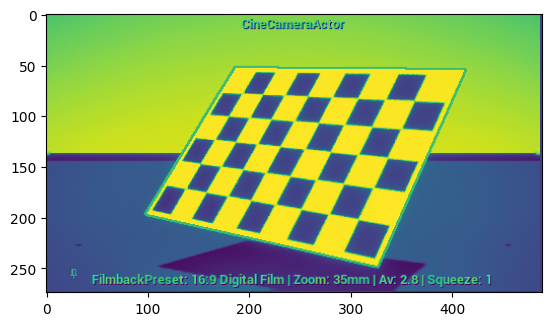

In [ ]:
f=images[1]

gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
cv2.findChessboardCorners(gray, (9, 6), None)

 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 
 ret: False corners: None 


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/calibration.cpp:3752: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCameraRO'


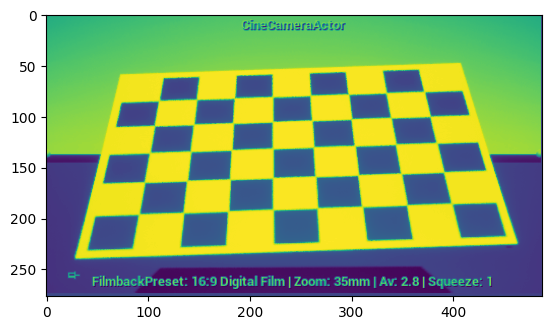

In [ ]:
from google.colab.patches import cv2_imshow

# Define the size of the checkerboard
checkerboard_size = (9, 6)  # Change this to match your checkerboard

square_size = 1.5 # in cm

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)
objp *= square_size

calib_frames = 25

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.
frames = 0

gray = None

for i in range(10):
  frame = images[i]

  # Convert to grayscale
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray)

  # Find the chessboard corners
  ret, corners = cv2.findChessboardCorners(gray, checkerboard_size, None)
  print(f" ret: {ret} corners: {corners} ")

  # If found, add object points, image points (after refining them)
  if ret:
      objpoints.append(objp)
      corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
      imgpoints.append(corners2)

      # Draw and display the corners
      frame = cv2.drawChessboardCorners(frame, checkerboard_size, corners2, ret)

      frames += 1

  #cv2_imshow('Calibration', frame)
  #if cv2.waitKey(1) & 0xFF == ord('q'):
  #    break
##print("6")

# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(f"Got {frames} frames")
# Print calibration results
print("Camera matrix:")
print(mtx)
print("Distortion coefficients:")
print(dist)

In [ ]:
import numpy as np

def angle_between_camera_and_object_direction(K, R, t, object_3d_coord, object_2d_pixel_coord):
    """
    Calculate the angle between the camera forward direction and the vector joining the camera center to the object.

    Args:
    - K: Camera intrinsic matrix (3x3)
    - R: Rotation matrix representing camera pose (3x3)
    - t: Translation vector representing camera pose (3x1)
    - object_3d_coord: 3D coordinates of the object
    - object_2d_pixel_coord: 2D pixel coordinates of the object in the image

    Returns:
    - angle: Angle between camera forward direction and object direction (in degrees)
    """

    # Convert pixel coordinates to homogeneous coordinates
    object_pixel_homogeneous = np.array([[object_2d_pixel_coord[0]], [object_2d_pixel_coord[1]], [1]])

    # Convert 2D pixel coordinates to normalized device coordinates (NDC)
    object_ndc = np.linalg.inv(K) @ object_pixel_homogeneous
    object_ndc /= object_ndc[2]

    # Convert NDC to camera coordinates
    object_camera = np.array([[object_ndc[0]], [object_ndc[1]], [1]])

    # Calculate direction vector from camera center to object
    direction_vector = np.linalg.inv(R) @ object_camera
    direction_vector /= np.linalg.norm(direction_vector)

    # Calculate camera forward direction
    camera_forward = np.array([[0], [0], [1]])

    # Calculate the dot product between camera forward direction and object direction
    dot_product = np.dot(camera_forward.T, direction_vector)

    # Calculate the angle between camera forward direction and object direction
    angle = np.arccos(dot_product) * (180 / np.pi)

    return angle

# Example usage:
# K = Camera intrinsic matrix
# R = Rotation matrix representing camera pose
# t = Translation vector representing camera pose
# object_3d_coord = [x, y, z]  # 3D coordinates of the object
# object_2d_pixel_coord = [x, y]  # 2D pixel coordinates of the object in the image

# angle = angle_between_camera_and_object_direction(K, R, t, object_3d_coord, object_2d_pixel_coord)
# print("Angle between camera forward direction and object direction:", angle, "degrees")

In [ ]:
import numpy as np

def calculate_intrinsic_matrix(fov_horizontal_deg, aspect_ratio):
    """
    Calculate the OpenCV-style intrinsic matrix from the horizontal FOV and aspect ratio.

    Args:
    - fov_horizontal_deg: Horizontal field of view in degrees
    - aspect_ratio: Aspect ratio (width/height) of the image

    Returns:
    - K: OpenCV-style intrinsic matrix (3x3)
    """

    # Convert horizontal FOV to radians
    fov_horizontal_rad = np.deg2rad(fov_horizontal_deg)

    # Calculate focal length in x direction
    f_x = 0.5 / np.tan(fov_horizontal_rad / 2)

    # Calculate focal length in y direction based on aspect ratio
    f_y = 0.5 / np.tan(fov_horizontal_rad / 2)

    # Calculate principal point (assuming it's at the center)
    c_x = 0.5
    c_y = 0.5 / aspect_ratio

    # Construct the intrinsic matrix
    K = np.array([
        [f_x, 0, c_x],
        [0, f_y, c_y],
        [0, 0, 1]
    ])

    return K

# Example usage:
# horizontal_fov = 60  # in degrees
# aspect_ratio = 16/9
# K = calculate_intrinsic_matrix(horizontal_fov, aspect_ratio)
# print("Intrinsic matrix K:\n", K)


In [ ]:
m = calculate_intrinsic_matrix(55, 1.777)

In [ ]:
m

array([[0.96049106, 0.        , 0.5       ],
       [0.        , 0.96049106, 0.2813731 ],
       [0.        , 0.        , 1.        ]])

In [ ]:
# Now, let's assume we don't know the

In [ ]:
def calculate_horizontal_fov(K, image_width):
    """
    Calculate the horizontal field of view (FOV) in degrees from the intrinsic matrix.

    Args:
    - K: Intrinsic matrix (3x3)
    - image_width: Width of the image in pixels

    Returns:
    - horizontal_fov_deg: Horizontal FOV in degrees
    """
    # Extract focal length in x direction
    f_x = K[0, 0]

    # Calculate horizontal FOV
    horizontal_fov_rad = 2 * np.arctan(image_width / (2 * f_x))
    horizontal_fov_deg = np.rad2deg(horizontal_fov_rad)

    return horizontal_fov_deg

In [ ]:
calculate_horizontal_fov(m, 1)

54.99999999999999

In [ ]:
actual_matrix = np.matrix([[1.22407007e+03, 0.00000000e+00, 6.23864469e+02],
 [0.00000000e+00, 1.22379652e+03, 3.64567545e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
calculate_horizontal_fov(actual_matrix, 1280)

55.20526635605999

In [ ]:
# Nuestras webcams tienen un FOV de 55 grados!!!!

In [ ]:
# Ahora, necesito la T que relaciona L con R